Name : Gourav Verma<br>
Class : DSC540-T303<br>
Assignment : Project_Milestone 3<br>
Topic : Cleaning/Formatting Website Data<br>

In [1]:
# Import necessary libraries
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
# Function to Loop through each page and collect the data

def readpage(soup):
    symbols = []
    names = []
    changes = []
    perchanges = []
    printras = []
    avg50s = []
    avg200s = []
    rtrn3mons = []

    for row in soup.find_all('tbody'):
        for srow in row.find_all('tr', attrs={'class':'simpTblRow'}):
            for symbol in srow.find_all('td', attrs={'aria-label':'Symbol'}):
                symbols.append(symbol.text)
            for name in srow.find_all('td', attrs={'aria-label':'Name'}):
                names.append(name.text)
            for change in srow.find_all('td', attrs={'aria-label':'Change'}):
                changes.append(change.text)
            for perchange in srow.find_all('td', attrs={'aria-label':'% Change'}):
                perchanges.append(perchange.text)
            for printra in srow.find_all('td', attrs={'aria-label':'Price (Intraday)'}):
                printras.append(printra.text)
            for avg50 in srow.find_all('td', attrs={'aria-label':'50 Day Average'}):
                avg50s.append(avg50.text)
            for avg200 in srow.find_all('td', attrs={'aria-label':'200 Day Average'}):
                avg200s.append(avg200.text)
            
    df = pd.DataFrame({"Symbol": symbols, "Name": names, "Change": changes, "%_Change": perchanges, "50_Day_Avg": avg50s, 
              "200_Day_Avg": avg200s})
    return df

In [3]:
# Function to Read top mutual funds from yahoo finance 

dfs = []
def readweb():
    for i in range(0, 1300, 100):
        url = 'https://finance.yahoo.com/screener/predefined/top_mutual_funds?count=100&offset='+str(i)+''
        webMF = requests.get(url).text
        soup = BeautifulSoup(webMF)
        df = readpage(soup)
        dfs.append(df)                             # Append dataframes into a list
        
    df_MF = pd.concat(dfs, ignore_index=True)      # Concatenate all dataframes of each page into single dataframe
    
    return df_MF
    

In [4]:
# Collect data from yahoofinance.com into a dataframe
df_MF = readweb() 
df_MF.head()

,Symbol,Name,Change,%_Change,50_Day_Avg,200_Day_Avg
0,FSAIX,Fidelity Select Portfolios Air Transportation ...,-0.66,-1.45%,40.77,60.77
1,WESCX,TETON Westwood SmallCap Equity Fund Class AAA,-0.45,-2.95%,13.48,16.20
2,TFIFX,T. Rowe Price Financial Services Fund I Class,-0.29,-1.30%,20.29,24.73
3,FSSNX,Fidelity Small Cap Index Fund,-0.46,-2.52%,16.13,18.54
4,FSHOX,Fidelity Select Construction & Housing Portfolio,-0.90,-1.58%,49.39,57.36


In [5]:
df_MF.describe()

,Symbol,Name,Change,%_Change,50_Day_Avg,200_Day_Avg
count,1300,1300,1300,1300,1300,1300
unique,1239,1239,178,349,1014,1031
top,FELAX,Cohen & Steers Institutional Realty Shares,0.00,0.00%,14.48,16.55
freq,2,2,57,57,5,5


**As per the website filter for the list is-**<br>
Price(Intraday) > 15<br>
Morningstar rating = 4 or 5<br>
Initial Minimum Investment = 1000 <br>
Exchange = Nasdaq<br> 

#### Find Duplicates

In previous runs I have found some dubplicate entries in website. Below code is to remove duplicates.

In [6]:
df_MF1 = df_MF.drop_duplicates(subset ='Symbol', keep = 'first', inplace = False)
df_MF1 = df_MF1.reset_index(drop=True)
df_MF1.info()
print('Duplicate entries in the dataframe was : ', df_MF.duplicated(['Symbol']).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 6 columns):
Symbol         1239 non-null object
Name           1239 non-null object
Change         1239 non-null object
%_Change       1239 non-null object
50_Day_Avg     1239 non-null object
200_Day_Avg    1239 non-null object
dtypes: object(6)
memory usage: 58.2+ KB
Duplicate entries in the dataframe was :  61


#### Format Data

In [7]:
# Remove % and + signs from Columns
df_MF1['%_Change'] = df_MF1['%_Change'].str.replace('%', '')
df_MF1['%_Change'] = df_MF1['%_Change'].str.replace('+', '')
df_MF1['Change'] = df_MF1['Change'].str.replace('+', '')

# Format variables as float
df_MF1['Change'] = df_MF1['Change'].astype('float')
df_MF1['%_Change'] = df_MF1['%_Change'].astype('float')
df_MF1['50_Day_Avg'] = df_MF1['50_Day_Avg'].astype('float')
df_MF1['200_Day_Avg'] = df_MF1['200_Day_Avg'].astype('float')


df_MF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 6 columns):
Symbol         1239 non-null object
Name           1239 non-null object
Change         1239 non-null float64
%_Change       1239 non-null float64
50_Day_Avg     1239 non-null float64
200_Day_Avg    1239 non-null float64
dtypes: float64(4), object(2)
memory usage: 58.2+ KB


#### Find Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1f095097608>,
 'caps': [<matplotlib.lines.Line2D at 0x1f09509c308>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f09509a9c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f094994208>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f092f05a08>],
 'means': []}

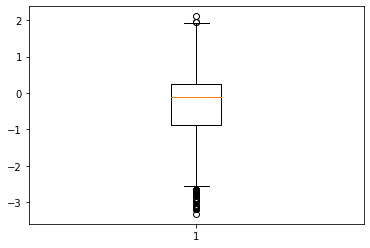

In [8]:
plt.boxplot(df_MF1['%_Change'])

Rest of the data looks good. So no further transformation required. 

In [9]:
# Write Final Dataframe into CSV file

df_MF1.to_csv('MF_Web.csv')